# 1. Importing and Installing all required Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

You should consider upgrading via the 'C:\Users\jqgas\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Creating Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Variable for the Holistic Model
mp_drawing = mp.solutions.drawing_utils # Variable for Drawing Utilities (Enable drawing of face, pose and hands)

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # This is the Colour Conversion from BGR to RGB
    image.flags.writeable = False                  # Makes Iimage Non-writeable
    results = model.process(image)                 # This will make prediction
    image.flags.writeable = True                   # Makes Image Writable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # This is the Colour Conversion from RGB to BGR
    return image, results

In [5]:
def draw_landmarks(image, results): # This will show the landmarks when webcam is on
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # This Will Draw face Connections
    #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # This Will Draw Pose Connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # This Will Draw The Left Hand Connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # This Will Draw The Right Hand Connections

In [6]:
def draw_styled_landmarks(image, results):
    #This will draw the face connections with the desired formating
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             #mp_drawing.DrawingSpec(color=(70,100,15), thickness=1, circle_radius=1), 
                             #mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             #) 
    #This will draw the pose connections with the desired formating
    #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             #mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             #mp_drawing.DrawingSpec(color=(0,85,170), thickness=2, circle_radius=2)
                             #) 
    #This will draw the left hand connections with the desired formating
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(55,40,30), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # This will draw right the hand connections with the desired formating
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# This will set the mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # To read feed
        ret, frame = cap.read()

        # To make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # To draw landmarks
        draw_styled_landmarks(image, results)

        # To show to screen
        cv2.imshow('OpenCV Feed', image)

        # To quit camera window
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [46]:
#cap.release()
#cv2.destroyAllWindows()

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results) # This funtion will draw the landmarks onto the user

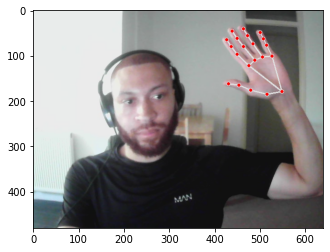

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # Function to help visualize the landmarks (Using Matplotlib)

# 3. Extracting the Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
lh = []
for res in results.left_hand_landmarks.landmark: # CHANGED TO LEFT HAND 
    test = np.array([res.x, res.y, res.z,])
    lh.append(test)

In [14]:
#pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 8.58850956e-01,  3.74014735e-01,  2.77617602e-07,  8.07382226e-01,
        3.87164593e-01, -2.10120156e-02,  7.51262307e-01,  3.67556423e-01,
       -2.95489114e-02,  7.09782600e-01,  3.45036477e-01, -3.64558883e-02,
        6.74027979e-01,  3.37858319e-01, -4.26740423e-02,  7.44350135e-01,
        2.56015390e-01, -9.38551221e-03,  7.04467833e-01,  2.02212557e-01,
       -2.20207162e-02,  6.83291793e-01,  1.67582750e-01, -3.43831182e-02,
        6.67371154e-01,  1.35861650e-01, -4.37602140e-02,  7.65056372e-01,
        2.29573712e-01, -1.00379372e-02,  7.25394666e-01,  1.68357447e-01,
       -1.93652529e-02,  7.03461528e-01,  1.29809111e-01, -2.95720138e-02,
        6.87054515e-01,  9.60995257e-02, -3.76441851e-02,  7.91539073e-01,
        2.16499537e-01, -1.43877994e-02,  7.58507371e-01,  1.54986814e-01,
       -2.47693416e-02,  7.40211785e-01,  1.18365541e-01, -3.16194892e-02,
        7.25277066e-01,  8.69082808e-02, -3.70256267e-02,  8.24301004e-01,
        2.11930901e-01, -

# 4. Setting up folders for  data collection

In [19]:
# This will be the path to store the exported data, numpy arrays
DATA_PATH = os.path.join('Mp_Data') 

# These are the current gestures that we will try to detect
gestures = np.array(['Hello','ThankYou','Sorry','GoodMorning', 'Welcome', 'Stop', 'IloveYou', '1', '2', '3','4', '5', '6', '7', '8', '9', '10'])

# I will use 30 videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [20]:
for action in gestures: # This will loop through all the different gestures
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence))) # This will create all necesary folders, subfolders and sequences
        except:
            pass

# 5. Collecting the Keypoint Values for Training and Testing

In [60]:
cap = cv2.VideoCapture(0)
    # To Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW This will loop though all gestures
    # Loop through gestures
    for action in gestures:
         #This will loop through the sequences (videos) 
        for sequence in range(no_sequences):
            #This will loop through video length ( sequence length) 
            for frame_num in range(sequence_length):

                # To read feed
                ret, frame = cap.read()

                # To make detections
                image, results = mediapipe_detection(frame, holistic)

                # To draw Landmarks
                draw_styled_landmarks(image, results)
                
                # NEW This will apply Wait Logic (breaks between each sequence)
                if frame_num == 0: 
                    cv2.putText(image, 'INITIATING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Showing to Screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                     # To Show on screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Keypoints extraction 
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # To quit camera Window
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [49]:
#cap.release()
#cv2.destroyAllWindows()

# 6. Preprocessing data and creating Labels and Features

In [21]:
#Importing dependencies for Test and Train
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(gestures)}

In [23]:
label_map

{'Hello': 0,
 'ThankYou': 1,
 'Sorry': 2,
 'GoodMorning': 3,
 'Welcome': 4,
 'Stop': 5,
 'IloveYou': 6,
 '1': 7,
 '2': 8,
 '3': 9,
 '4': 10,
 '5': 11,
 '6': 12,
 '7': 13,
 '8': 14,
 '9': 15,
 '10': 16}

In [24]:
# To read data from all different numpy arrays
sequences, labels = [], []
for action in gestures:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(510, 30, 126)

In [26]:
np.array(labels).shape

(510,)

In [27]:
X = np.array(sequences)

In [28]:
X.shape

(510, 30, 126)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [33]:
y_test.shape

(26, 17)

# 7. Building and Training the LSTM Neural Network

In [34]:
# To build a sequential neuro-network 
from tensorflow.keras.models import Sequential

# To create a temporal component to build a neuro-network which allows to perform action detection, dense is a normal fully connected layer
from tensorflow.keras.layers import LSTM, Dense

# To allow logging inside of tensorboard to trace and monitor the model as it is training
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(gestures.shape[0], activation='softmax'))

In [37]:
res = [.7, 0.2, 0.1]

In [38]:
gestures[np.argmax(res)]

'Hello'

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [87]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
16/16 [==============================] - 3s 55ms/step - loss: 2.8325 - categorical_accuracy: 0.0542
Epoch 2/1000
16/16 [==============================] - 0s 31ms/step - loss: 2.7749 - categorical_accuracy: 0.1068
Epoch 3/1000
16/16 [==============================] - 0s 31ms/step - loss: 2.6775 - categorical_accuracy: 0.1748
Epoch 4/1000
16/16 [==============================] - 0s 30ms/step - loss: 2.6577 - categorical_accuracy: 0.1574
Epoch 5/1000
16/16 [==============================] - 0s 30ms/step - loss: 2.6066 - categorical_accuracy: 0.1275
Epoch 6/1000
16/16 [==============================] - 0s 30ms/step - loss: 2.5579 - categorical_accuracy: 0.1655
Epoch 7/1000
16/16 [==============================] - 0s 31ms/step - loss: 2.6998 - categorical_accuracy: 0.1453
Epoch 8/1000
16/16 [==============================] - 0s 30ms/step - loss: 2.6595 - categorical_accuracy: 0.1647
Epoch 9/1000
16/16 [==============================] - 0s 30ms/step - loss: 2.8558 - categorical_

16/16 [==============================] - 1s 32ms/step - loss: 0.5058 - categorical_accuracy: 0.8282
Epoch 144/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.5021 - categorical_accuracy: 0.7878
Epoch 145/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.5514 - categorical_accuracy: 0.7886
Epoch 146/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.4243 - categorical_accuracy: 0.8208
Epoch 147/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.4461 - categorical_accuracy: 0.8046
Epoch 148/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.3608 - categorical_accuracy: 0.8575
Epoch 149/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.3889 - categorical_accuracy: 0.8629
Epoch 150/1000
16/16 [==============================] - 1s 31ms/step - loss: 0.3086 - categorical_accuracy: 0.8776
Epoch 151/1000
16/16 [==============================] - 1s 32ms/step - loss: 0.3934 - categoric

16/16 [==============================] - 0s 31ms/step - loss: 0.1394 - categorical_accuracy: 0.9431
Epoch 286/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.1550 - categorical_accuracy: 0.9528
Epoch 287/1000
16/16 [==============================] - 1s 32ms/step - loss: 0.1430 - categorical_accuracy: 0.9422
Epoch 288/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.1632 - categorical_accuracy: 0.9365
Epoch 289/1000
16/16 [==============================] - 1s 36ms/step - loss: 0.1087 - categorical_accuracy: 0.9634
Epoch 290/1000
16/16 [==============================] - 1s 31ms/step - loss: 0.0878 - categorical_accuracy: 0.9669
Epoch 291/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.2056 - categorical_accuracy: 0.9165
Epoch 292/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.1798 - categorical_accuracy: 0.9425
Epoch 293/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.2717 - categoric

16/16 [==============================] - 0s 31ms/step - loss: 0.0688 - categorical_accuracy: 0.9843
Epoch 428/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.0841 - categorical_accuracy: 0.9736
Epoch 429/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.0509 - categorical_accuracy: 0.9821
Epoch 430/1000
16/16 [==============================] - 1s 36ms/step - loss: 0.0330 - categorical_accuracy: 0.9872
Epoch 431/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.0202 - categorical_accuracy: 0.9967
Epoch 432/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.0256 - categorical_accuracy: 0.9928
Epoch 433/1000
16/16 [==============================] - 1s 32ms/step - loss: 0.0462 - categorical_accuracy: 0.9738
Epoch 434/1000
16/16 [==============================] - 1s 33ms/step - loss: 0.0314 - categorical_accuracy: 0.9882
Epoch 435/1000
16/16 [==============================] - 1s 33ms/step - loss: 0.0366 - categoric

16/16 [==============================] - 0s 30ms/step - loss: 0.0116 - categorical_accuracy: 0.9954
Epoch 570/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.0336 - categorical_accuracy: 0.9925
Epoch 571/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.0100 - categorical_accuracy: 0.9971
Epoch 572/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.0106 - categorical_accuracy: 0.9986
Epoch 573/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.0049 - categorical_accuracy: 0.9996
Epoch 574/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.0125 - categorical_accuracy: 0.9962
Epoch 575/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.0082 - categorical_accuracy: 0.9967
Epoch 576/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.0537 - categorical_accuracy: 0.9744
Epoch 577/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.0657 - categoric

KeyboardInterrupt: 

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            48896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 17)                561       
Total params: 203,921
Trainable params: 203,921
Non-trainable params: 0
________________________________________________

# 8. Making Predictions

In [51]:
res = model.predict(X_test)

In [52]:
gestures[np.argmax(res[4])]

'9'

In [53]:
gestures[np.argmax(y_test[4])]

'9'

# 9. Saving Weights

In [54]:
model.save('gesture.h5')

In [55]:
model.load_weights('gesture.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [56]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [57]:
yhat = model.predict(X_test)

In [58]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [59]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[23,  0],
        [ 0,  3]],

       [[25,  0],
        [ 0,  1]],

       [[25,  0],
        [ 0,  1]],

       [[25,  0],
        [ 0,  1]],

       [[24,  0],
        [ 0,  2]],

       [[25,  0],
        [ 0,  1]],

       [[25,  0],
        [ 0,  1]],

       [[24,  0],
        [ 0,  2]],

       [[25,  0],
        [ 0,  1]],

       [[25,  0],
        [ 0,  1]],

       [[24,  0],
        [ 0,  2]],

       [[23,  0],
        [ 0,  3]],

       [[24,  0],
        [ 0,  2]],

       [[24,  0],
        [ 0,  2]],

       [[23,  0],
        [ 0,  3]]], dtype=int64)

In [60]:
accuracy_score(ytrue, yhat)

1.0

# 11. Testing the system in Real Time

In [61]:
colors = [(170,35,255), (33,33,33), (0,85,170), (227,207,87), (0,255,255), (255,255,0), (128,128,105),(255,62,150), (255,225,255), (0,128,128), (185,211,238), (131,111,255),(142,142,56),(144,238,144),(255,128,0),(3,168,158),(255,211,155)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_4)
        
    return output_frame

In [70]:
# 1. Detection variables
sequence = []
sentence = []
predictions = [] # UPDATED IMPROVEMENT
threshold = 0.8

cap = cv2.VideoCapture(0)

def make_1080p():
    cap.set(3, 1920)
    cap.set(4, 1080)

def make_720p():
    cap.set(3, 1280)
    cap.set(4, 720)

def make_480p():
    cap.set(3, 640)
    cap.set(4, 480)

def change_res(width, height):
    cap.set(3, width)
    cap.set(4, height)

make_720p()
change_res(1280, 720)

    # To Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.8) as holistic:
    while cap.isOpened():

        # To Read feed
        ret, frame = cap.read()

        # To Make Detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # To Draw Landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction Logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints) # UPDATED IMPROVEMENT
        sequence = sequence[-30:] # UPDATED IMPROVEMENT
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(gestures[np.argmax(res)])
            predictions.append(np.argmax(res)) # UPDATED IMPROVEMENT
            
            
        #3. Visualization Logic
            if np.unique(predictions[-20:])[0]==np.argmax(res): # UPDATED IMPROVEMENT
                if res[np.argmax(res)] > threshold: 
                
                    if len(sentence) > 0: 
                        if gestures[np.argmax(res)] != sentence[-1]:
                            sentence.append(gestures[np.argmax(res)])
                    else:
                        sentence.append(gestures[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            #4. Viz probabilities
            image = prob_viz(res, gestures, image, colors)
            
        cv2.rectangle(image, (0,0), (1280, 40), (240,128,128), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_4)
        
        # To show on screen
        cv2.imshow('OpenCV Feed', image)
        cv2.resizeWindow('OpenCV Feed', 1280, 720)

        # To quit Webcamera window
        if cv2.waitKey(10) & 0xFF == ord('w'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
S

6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutpu

2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.Solut

<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.Solutio

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ThankYou
<class 'mediapipe.python.solution_base

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs

10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.Solution

8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs

<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.Solu

4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.Solution

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.p

3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
IloveYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
IloveYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9
<class 'mediapipe.python.solution_base.S

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe

5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GoodMorning
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3
<class 'mediapipe.python.solution_

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.

Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Welcome


In [171]:
cap.release()
cv2.destroyAllWindows()

In [66]:
res[np.argmax(res)] > threshold

True

In [67]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0., 0., 1.]], dtype=float32)